<div style=" background-color: RGB(61, 85, 12);" >
<h1 style="margin: auto; padding: 20px 0; color:white; text-align: center">PROJET 2 - AI ENGINEER</h1>
<h2 style="margin: auto; padding: 20px 0; color:white; text-align: center">Participez à un concours sur la Smart City</h2>
</div>

<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">Objectifs de l'analyse</h3>

Le but de ce projet est de réaliser une analyse exploratoire du jeu de données portant sur les arbres de la ville de Paris, dans le cadre du programme "Végétalisons la ville".

Les résultats contribueront à <b>une optimisation des tournées pour l'entretien des arbres de la ville</b>.

Le fichier géo-localise une partie des arbres relevant de la Ville de Paris.

Cela inclut les arbres d’alignement (dans les rues), ceux des espaces verts et des équipements publics municipaux. Elle n’inclut pas les bosquets, les ensembles forestiers, les arbres du domaine privé etc.

Dans ce fichier sont renseignés la mensuration, la classification des arbres (partielle et pour les arbres remarquables).

### Sommaire

* [Partie 1 - Importation des librairies et chargement des fichiers](#partie1)
    * [1.1 - Importation des librairies](#partie1_1)
    * [1.2 - Chargement du fichier Excel](#partie1_2)
* [Partie 2 - Analyse exploratoire du dataframe](#partie2)
* [Partie 3 - Analyse exploratoire des colonnes du dataframe](#partie3)
    * [3.1 - Analyse exploratoire de la colonne "id"](#partie3_1)
    * [3.2 - Analyse exploratoire de la colonne "type_emplacement"](#partie3_2)
    * [3.3 - Analyse exploratoire de la colonne "domanialite"](#partie3_3)
    * [3.4 - Analyse exploratoire de la colonne "arrondissement"](#partie3_4)
    * [3.5 - Analyse exploratoire de la colonne "complement_addresse"](#partie3_5)
    * [3.6 - Analyse exploratoire de la colonne "numero"](#partie3_6)
    * [3.7 - Analyse exploratoire de la colonne "lieu"](#partie3_7)
    * [3.8 - Analyse exploratoire de la colonne "id_emplacement"](#partie3_8)
    * [3.9 - Analyse exploratoire de la colonne "libelle_francais"](#partie3_9)
    * [3.10 - Analyse exploratoire de la colonne "genre"](#partie3_10)
    * [3.11 - Analyse exploratoire de la colonne "espece"](#partie3_11)
    * [3.12 - Analyse exploratoire de la colonne "variete"](#partie3_12)
    * [3.13 - Analyse exploratoire de la colonne "circonference_cm"](#partie3_13)
    * [3.14 - Analyse exploratoire de la colonne "hauteur_m"](#partie3_14)
    * [3.15 - Analyse exploratoire de la colonne "stade_developpement"](#partie3_15)
    * [3.16 - Analyse exploratoire de la colonne "remarquable"](#partie3_16)
    * [3.17 - Analyse exploratoire de la colonne "geo_point_2d_a" et "geo_point_2d_b"](#partie3_17)
    * [3.18 - Résultats de l'analyse exploratoire des colonnes](#partie3_18)
    * [3.19 - Vérification des doublons](#partie3_19)
* [Partie 4 - Vérification des valeurs aberrantes et nulles](#partie4)
    * [4.1 - Vérification des valeurs nulles](#partie4_1)
        * [4.1.a - Valeurs manquantes pour la variable "domanialite"](#partie4_1_1)
        * [4.1.b - Valeurs manquantes pour la variable "libelle_francais"](#partie4_1_2)
        * [4.1.c - Valeurs manquantes pour la variable "remarquable"](#partie4_1_3)
        * [4.1.d - Valeurs manquantes pour la variable "circonference_cm"](#partie4_1_4)
        * [4.1.e - Valeurs manquantes pour la variable "hauteur_m"](#partie4_1_5)
        * [4.1.f - Valeurs manquantes pour la variable "stade_developpement"](#partie4_1_6)
* [Partie 5 - Visualisations graphiques des données](#partie5)

<div style="background-color: RGB(89, 152, 26); text-align: center;" >
<h2 style="margin: auto; padding: 20px; color: white">Partie 1 - Importation des librairies et chargement des fichiers</h2>
<a class="anchor" id="partie1"></a>
</div>

<div style="border: 1px solid RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">1.1 - Importation des librairies</h3>
<a class="anchor" id="partie1_1"></a>
</div>

In [1]:
# Librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<div style="border: 1px solid RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">1.2 - Chargement du fichier Excel</h3>
<a class="anchor" id="partie1_2"></a>
</div>

In [2]:
# Importation du fichier Excel
arbres = pd.read_csv(r"data\p2-arbres-fr.csv", delimiter=";", engine="python")

#Sauvegarde du dataframe initial
df_arbres = arbres

<div style="background-color: RGB(89, 152, 26); text-align: center;" >
<h2 style="margin: auto; padding: 20px; color: white">Partie 2 - Analyse exploratoire du dataframe</h2>
<a class="anchor" id="partie2"></a>
</div>

In [3]:
# Affichage des dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(arbres.shape[0])) 
print("Le tableau comporte {} colonne(s)".format(arbres.shape[1]))

Le tableau comporte 200137 observation(s) ou article(s)
Le tableau comporte 18 colonne(s)


In [4]:
# Consulter le nombre de colonnes
# La nature des données dans chacune des colonnes
# Le nombre de valeurs présentes dans chacune des colonnes
arbres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

In [5]:
# Affichage des 5 premières lignes de la table
arbres.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [6]:
arbres.describe(include="all")

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,200137,200136,200137,30902,0.0,200137,200137,198640,200121,198385,36777,200137.000000,200137.000000,132932,137039.000000,200137.000000,200137.000000
unique,NaN,1,9,25,3795,NaN,6921,69040,192,175,539,436,NaN,NaN,4,NaN,NaN,NaN
top,NaN,Arbre,Alignement,PARIS 15E ARRDT,SN°,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,101001,Platane,Platanus,x hispanica,Baumannii',NaN,NaN,A,NaN,NaN,NaN
freq,NaN,200137,104949,17151,557,NaN,2995,1324,42508,42591,36409,4538,NaN,NaN,64438,NaN,NaN,NaN
mean,3.872027e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.380479,13.110509,NaN,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,673.190213,1971.217387,NaN,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,5.000000,NaN,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.000000,8.000000,NaN,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.000000,12.000000,NaN,0.000000,48.876447,2.386838


In [7]:
# Vérification du nombre de valeurs nulles
arbres.isnull().sum()

id                          0
type_emplacement            0
domanialite                 1
arrondissement              0
complement_addresse    169235
numero                 200137
lieu                        0
id_emplacement              0
libelle_francais         1497
genre                      16
espece                   1752
variete                163360
circonference_cm            0
hauteur_m                   0
stade_developpement     67205
remarquable             63098
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64

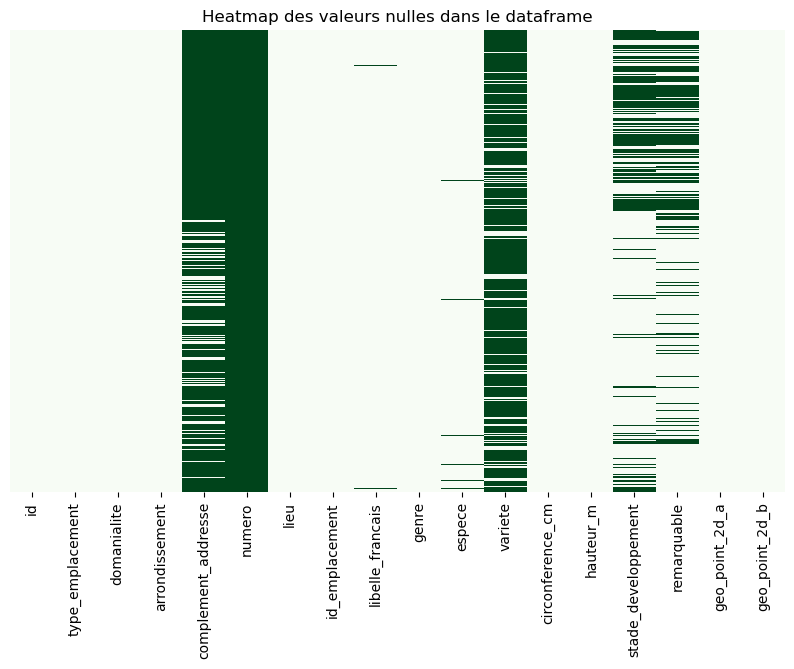

In [8]:
# Création d'une heatmap des valeurs nulles
plt.figure(figsize=(10, 6))
sns.heatmap(arbres.isnull(), cmap="Greens", cbar=False, yticklabels=False)

# Ajout d'une légende
plt.title("Heatmap des valeurs nulles dans le dataframe")
plt.show()

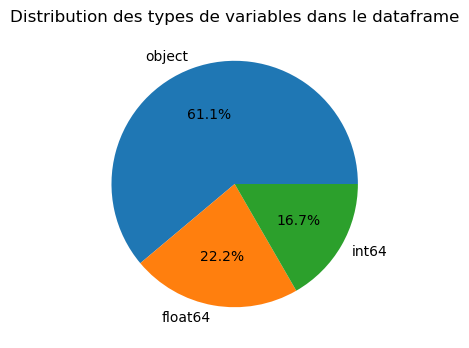

In [9]:
# Comptage du nombre de variables par type
types_count = arbres.dtypes.value_counts()

# Création d'un pie plot
plt.figure(figsize=(4, 4))
plt.pie(types_count, labels=types_count.index, autopct="%1.1f%%")

# Ajout d'un titre
plt.title("Distribution des types de variables dans le dataframe")

# Affichage du pie plot
plt.show()

In [10]:
# Création d'une liste vide pour stocker les résultats
resultats = []

# On parcoure chaque colonne du DataFrame
for colonne in arbres.columns:
    # Type de la variable
    type_variable = arbres[colonne].dtype
    
    # Nombre de valeurs nulles
    nb_valeurs_nulles = arbres[colonne].isnull().sum()
    
    # Calcul du pourcentage de valeurs nulles
    pourcentage_nulles = round((nb_valeurs_nulles / len(arbres)) * 100, 2)
    
    # Nombre de valeurs distinctes
    nb_valeurs_distinctes = arbres[colonne].nunique()
    
    # Ajout des résultats à la liste
    resultats.append([colonne, type_variable, nb_valeurs_nulles, pourcentage_nulles, nb_valeurs_distinctes ])

# Création d'un DataFrame à partir de la liste des résultats
tableau_resultats = pd.DataFrame(resultats, columns=["Nom de la colonne", "Type de variable", "Nombre de valeurs nulles", "Pourcentage de valeurs nulles", "Nombre de valeurs distinctes"])

# Affichage du tableau résultant
tableau_resultats

,Nom de la colonne,Type de variable,Nombre de valeurs nulles,Pourcentage de valeurs nulles,Nombre de valeurs distinctes
0,id,int64,0,0.00,200137
1,type_emplacement,object,0,0.00,1
2,domanialite,object,1,0.00,9
3,arrondissement,object,0,0.00,25
4,complement_addresse,object,169235,84.56,3795
5,numero,float64,200137,100.00,0
6,lieu,object,0,0.00,6921
7,id_emplacement,object,0,0.00,69040
8,libelle_francais,object,1497,0.75,192
9,genre,object,16,0.01,175


Avec la heatmap des valeurs nulles, on constate que pour certaines variables, il y a énormément de valeurs nulles.

C'est notamment le cas pour les colonnes <b>complement_addresse</b> (85% de valeurs nulles), <b>numero</b> (100%) et <b>variete</b> (82%).

Il y a aussi beaucoup de valeurs nulles pour les colonnes <b>stade_developpement</b> (34%) et <b>remarquable</b> (32%).

On constate aussi que pour la colonne <b>type_emplacement</b>, il n'y a qu'une seule valeur qui est utilisé.

<div style="background-color: RGB(89, 152, 26); text-align: center;" >
<h2 style="margin: auto; padding: 20px; color: white">Partie 3 - Analyse exploratoire des colonnes du dataframe</h2>
<a class="anchor" id="partie3"></a>
</div>

On va analyser chacune des colonnes de notre dataframe.

In [11]:
# Création de deux tableaux : un pour les colonnes que l'on va étudier par la suite, un pour les colonnes qui ne seront pas étudiés
colonnes_gardees = []
colonnes_non_gardees = []

colonnes_quantitatives = []
colonnes_qualitatives = []
colonnes_binaires = []

<div style="border: 1px solid RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.1 - Analyse exploratoire de la colonne "id"</h3>
<a class="anchor" id="partie3_1"></a>
</div>

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.1.a - Analyse</h3>
<a class="anchor" id="partie3_1_1"></a>
</div>

La colonne "id" semble correspondre à l'identifiant de chaque ligne. On va donc vérifier qu'il n'y a pas de doublons pour cette colonne afin de vérifier l'intégrité des données.

In [12]:
# Utilisation de la méthode duplicated() pour identifier les doublons dans la colonne "id"
duplicates = arbres[arbres.duplicated(subset=['id'], keep=False)]

# Affichage des lignes en doublons basées sur la colonne "id"
duplicates

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b


<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.1.b - Résultats</h3>
<a class="anchor" id="partie3_1_2"></a>
</div>

Il n'y a aucun doublon pour la colonne "id". Les identifiants des lignes sont donc bien uniques.

Cependant, comme cette colonne est un identifiant, il ne sera pas nécessaire par la suite de faire une analyse approfondie des valeurs de cette colonne.

In [13]:
colonnes_non_gardees.append("id")

<div style="border: 1px solid RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.2 - Analyse exploratoire de la colonne "type_emplacement"</h3>
<a class="anchor" id="partie3_2"></a>
</div>

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.2.a - Analyse</h3>
<a class="anchor" id="partie3_2_1"></a>
</div>

Comme vu précédemment, la colonne "type_emplacement" ne contient qu'une seule valeur pour toutes les lignes.

In [14]:
# Affichage des valeurs uniques de la colonne "type_emplacement"
valeurs_uniques_type_emplacement = arbres["type_emplacement"].unique()
valeurs_uniques_type_emplacement

array(['Arbre'], dtype=object)

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.2.b - Résultats</h3>
<a class="anchor" id="partie3_2_2"></a>
</div>

Cette colonne n'a aucun intérêt pour la suite de notre analyse, vu que les valeurs de cette colonne sont toutes égales à "Arbre".

Il ne serait donc pas nécessaire par la suite de faire une analyse approfondie des valeurs de cette colonne.

In [15]:
colonnes_non_gardees.append("type_emplacement")

<div style="border: 1px solid RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.3 - Analyse exploratoire de la colonne "domanialite"</h3>
<a class="anchor" id="partie3_3"></a>
</div>

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.3.a - Analyse</h3>
<a class="anchor" id="partie3_3_1"></a>
</div>

Il y a 9 valeurs distinctes pour cette colonne.

In [16]:
# Affichage des valeurs uniques de la colonne "domanialite"
valeurs_uniques_domanialite = arbres["domanialite"].unique()
valeurs_uniques_domanialite

array(['Jardin', 'Alignement', 'DJS', 'DFPE', 'CIMETIERE', 'DASCO', 'DAC',
       'PERIPHERIQUE', 'DASES', nan], dtype=object)

In [17]:
# Affichage du nombre de valeurs pour chaque valeur unique de la colonne "domanialite"
valeurs_uniques_count_domanialite = arbres["domanialite"].value_counts(dropna=False)
valeurs_uniques_count_domanialite

Alignement      104949
Jardin           46262
CIMETIERE        31926
DASCO             6422
PERIPHERIQUE      5327
DJS               3900
DFPE              1325
DAC                 21
DASES                4
NaN                  1
Name: domanialite, dtype: int64

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.3.b - Résultats</h3>
<a class="anchor" id="partie3_3_2"></a>
</div>

In [18]:
colonnes_gardees.append("domanialite")
colonnes_qualitatives.append("domanialite")

<div style="border: 1px solid RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.4 - Analyse exploratoire de la colonne "arrondissement"</h3>
<a class="anchor" id="partie3_4"></a>
</div>

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.4.a - Analyse</h3>
<a class="anchor" id="partie3_4_1"></a>
</div>

Il y a 25 valeurs distinctes pour cette colonne.

In [19]:
# Affichage des valeurs uniques de la colonne "arrondissement"
valeurs_uniques_arrondissement = arbres["arrondissement"].unique()
valeurs_uniques_arrondissement

array(['PARIS 7E ARRDT', 'PARIS 17E ARRDT', 'PARIS 16E ARRDT',
       'PARIS 4E ARRDT', 'PARIS 13E ARRDT', 'PARIS 12E ARRDT',
       'PARIS 19E ARRDT', 'PARIS 14E ARRDT', 'PARIS 15E ARRDT',
       'PARIS 3E ARRDT', 'PARIS 20E ARRDT', 'PARIS 18E ARRDT',
       'PARIS 6E ARRDT', 'PARIS 11E ARRDT', 'PARIS 1ER ARRDT',
       'PARIS 2E ARRDT', 'PARIS 5E ARRDT', 'VAL-DE-MARNE',
       'SEINE-SAINT-DENIS', 'HAUTS-DE-SEINE', 'PARIS 9E ARRDT',
       'PARIS 10E ARRDT', 'PARIS 8E ARRDT', 'BOIS DE BOULOGNE',
       'BOIS DE VINCENNES'], dtype=object)

In [20]:
# Affichage du nombre de valeurs pour chaque valeur unique de la colonne "arrondissement"
valeurs_uniques_count_arrondissement = arbres["arrondissement"].value_counts(dropna=False)
valeurs_uniques_count_arrondissement

PARIS 15E ARRDT      17151
PARIS 13E ARRDT      16712
PARIS 16E ARRDT      16403
PARIS 20E ARRDT      15340
PARIS 19E ARRDT      13709
PARIS 12E ARRDT      12600
SEINE-SAINT-DENIS    11570
BOIS DE VINCENNES    11510
PARIS 14E ARRDT      11399
PARIS 17E ARRDT      10762
PARIS 18E ARRDT      10011
PARIS 7E ARRDT        8617
VAL-DE-MARNE          7580
PARIS 8E ARRDT        7245
PARIS 11E ARRDT       5658
HAUTS-DE-SEINE        5298
BOIS DE BOULOGNE      3978
PARIS 10E ARRDT       3385
PARIS 4E ARRDT        2740
PARIS 5E ARRDT        2368
PARIS 6E ARRDT        1764
PARIS 1ER ARRDT       1413
PARIS 3E ARRDT        1209
PARIS 9E ARRDT        1167
PARIS 2E ARRDT         548
Name: arrondissement, dtype: int64

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.4.b - Résultats</h3>
<a class="anchor" id="partie3_4_2"></a>
</div>

On retrouve les 20 arrondissements parisiens, ainsi que 3 départements voisins de l'Île de France (Val-de-Marne, Seine-Saint-Denis et Hauts-de-Seine) et enfin deux bois (le Bois de Boulogne et le Bois de Vincennes).

In [21]:
colonnes_gardees.append("arrondissement")
colonnes_qualitatives.append("arrondissement")

<div style="border: 1px solid RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.5 - Analyse exploratoire de la colonne "complement_addresse"</h3>
<a class="anchor" id="partie3_5"></a>
</div>

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.5.a - Analyse</h3>
<a class="anchor" id="partie3_5_1"></a>
</div>

Il y a environ 85% de valeurs nulles pour cette variable.

In [22]:
# Affichage du nombre de valeurs pour chaque valeur unique de la colonne "complement_addresse"
valeurs_uniques_count_complement_addresse = arbres["complement_addresse"].value_counts(dropna=False)
valeurs_uniques_count_complement_addresse

NaN           169235
SN°              557
1                552
2                547
3                498
               ...  
F 99               1
93 Flandre         1
F 97               1
F 75               1
40face             1
Name: complement_addresse, Length: 3796, dtype: int64

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.5.b - Résultats</h3>
<a class="anchor" id="partie3_5_2"></a>
</div>

Les valeurs pour cette colonne ne sont pas pertinentes et n'apporteront rien à l'étude, nous pouvons donc enlever cette colonne de la suite de l'étude.

In [23]:
colonnes_non_gardees.append("complement_addresse")

<div style="border: 1px solid RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.6 - Analyse exploratoire de la colonne "numero"</h3>
<a class="anchor" id="partie3_6"></a>
</div>

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.6.a - Analyse</h3>
<a class="anchor" id="partie3_6_1"></a>
</div>

Il y a environ 100% de valeurs nulles pour cette variable.

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.6.b - Résultats</h3>
<a class="anchor" id="partie3_6_2"></a>
</div>

Toutes les valeurs pour cette colonne étant nulles, nous pouvons donc enlever cette colonne de la suite de l'étude.

In [24]:
colonnes_non_gardees.append("numero")

<div style="border: 1px solid RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.7 - Analyse exploratoire de la colonne "lieu"</h3>
<a class="anchor" id="partie3_7"></a>
</div>

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.7.a - Analyse</h3>
<a class="anchor" id="partie3_7_1"></a>
</div>

Il y a 6 921 valeurs distinctes pour cette colonne.

In [25]:
# Affichage du nombre de valeurs pour chaque valeur unique de la colonne "lieu"
valeurs_uniques_count_lieu = arbres["lieu"].value_counts(dropna=False)
valeurs_uniques_count_lieu

PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE                       2995
PARC DES BUTTES CHAUMONT                                          2331
PARC ANDRE CITROEN                                                2095
PARC OMNISPORT SUZANNE LENGLEN / 7 BOULEVARD DES FRERES VOISIN    1478
INSEP / AVENUE DU TREMBLAY                                        1293
                                                                  ... 
CIMETIERE ST VINCENT / DIV 5                                         1
ROUTE DU LAC A BAGATELLE                                             1
ROUTE DE LA PORTE SAINT-JAMES                                        1
PENTE DE GRAVELLE - AVENUE DE GRAVELLE / ROUTE NOUVELLE              1
CIMETIERE DE PANTIN / DIV 66                                         1
Name: lieu, Length: 6921, dtype: int64

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.7.b - Résultats</h3>
<a class="anchor" id="partie3_7_2"></a>
</div>

Les valeurs pour cette colonne ne sont pas pertinentes et n'apporteront rien à l'étude, nous pouvons donc enlever cette colonne de la suite de l'étude.

In [26]:
colonnes_non_gardees.append("lieu")

<div style="border: 1px solid RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.8 - Analyse exploratoire de la colonne "id_emplacement"</h3>
<a class="anchor" id="partie3_8"></a>
</div>

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.8.a - Analyse</h3>
<a class="anchor" id="partie3_8_1"></a>
</div>

Il y a 69 040 valeurs distinctes pour cette colonne.

In [27]:
# Affichage du nombre de valeurs pour chaque valeur unique de la colonne "id_emplacement"
valeurs_uniques_count_id_emplacement = arbres["id_emplacement"].value_counts(dropna=False)
valeurs_uniques_count_id_emplacement

101001          1324
101002          1241
101003          1128
202001          1032
101004          1020
                ... 
A15100096004       1
A15100096003       1
A15100096002       1
A15100096001       1
720170155          1
Name: id_emplacement, Length: 69040, dtype: int64

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.8.b - Résultats</h3>
<a class="anchor" id="partie3_8_2"></a>
</div>

Les valeurs pour cette colonne ne sont pas pertinentes et n'apporteront rien à l'étude, nous pouvons donc enlever cette colonne de la suite de l'étude.

In [28]:
colonnes_non_gardees.append("id_emplacement")

<div style="border: 1px solid RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.9 - Analyse exploratoire de la colonne "libelle_francais"</h3>
<a class="anchor" id="partie3_9"></a>
</div>

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.9.a - Analyse</h3>
<a class="anchor" id="partie3_9_1"></a>
</div>

Il y a 192 valeurs distinctes pour cette colonne.

In [29]:
# Affichage du nombre de valeurs pour chaque valeur unique de la colonne "libelle_francais"
valeurs_uniques_count_libelle_francais = arbres["libelle_francais"].value_counts(dropna=False)
valeurs_uniques_count_libelle_francais

Platane       42508
Marronnier    25207
Tilleul       21305
Erable        18389
Sophora       11797
              ...  
Maackie           1
Jujubier          1
Camphrier         1
Sycopsis          1
Garrya            1
Name: libelle_francais, Length: 193, dtype: int64

In [30]:
valeurs_uniques_count_libelle_francais.head(20)

Platane                 42508
Marronnier              25207
Tilleul                 21305
Erable                  18389
Sophora                 11797
Frêne                    5171
Pin                      4844
Micocoulier              4201
Chêne                    3866
Cerisier à fleurs        3767
Charme                   3471
Poirier à fleurs         3409
Noisetier de Byzance     3372
Peuplier                 3314
Robinier                 2305
Bouleau                  2249
Orme                     2066
If                       1995
Hêtre                    1926
NaN                      1497
Name: libelle_francais, dtype: int64

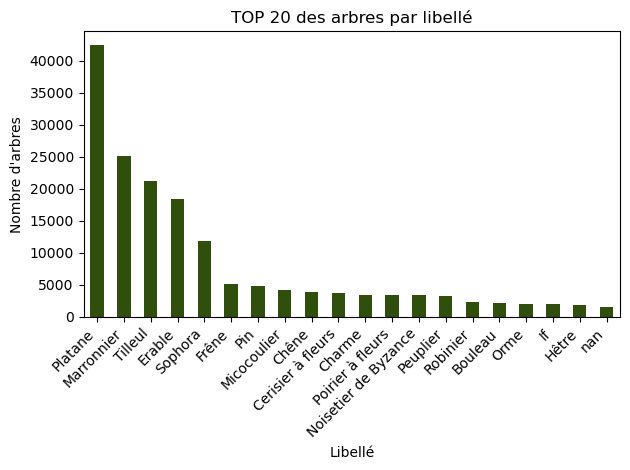

In [31]:
# Création de l'histogramme
valeurs_uniques_count_libelle_francais.head(20).plot(kind='bar', color='#314F0C')

plt.title("TOP 20 des arbres par libellé")
plt.xlabel("Libellé")
plt.ylabel("Nombre d'arbres")
plt.xticks(rotation=45, ha='right') # Rotation des étiquettes pour une meilleure lisibilité
plt.tight_layout() # Ajuste automatiquement les paramètres de la figure pour qu'elle s'inscrive dans la zone d'affichage

plt.show()

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.9.b - Résultats</h3>
<a class="anchor" id="partie3_9_2"></a>
</div>

On dénombre un très grand nombre d'arbres du même genre avec des genres très fortement représentés (42 508 platanes, 25 207 marronniers, 21 305 tilleuls, 18 389 érables et 11 797 sophora), des genres beaucoup moins représentés (moins de 5 000 arbres) et des genres très peu représentés (1 arbre).

In [32]:
colonnes_gardees.append("libelle_francais")
colonnes_qualitatives.append("libelle_francais")

<div style="border: 1px solid RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.10 - Analyse exploratoire de la colonne "genre"</h3>
<a class="anchor" id="partie3_10"></a>
</div>

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.10.a - Analyse</h3>
<a class="anchor" id="partie3_10_1"></a>
</div>

Il y a 175 valeurs distinctes pour cette colonne.

In [33]:
# Affichage du nombre de valeurs pour chaque valeur unique de la colonne "genre"
valeurs_uniques_count_genre = arbres["genre"].value_counts(dropna=False)
valeurs_uniques_count_genre

Platanus      42591
Aesculus      25341
Tilia         21550
Acer          18471
Sophora       11830
              ...  
Sycopsis          1
Enkianthus        1
Euscaphis         1
Caragana          1
Phoenix           1
Name: genre, Length: 176, dtype: int64

In [34]:
valeurs_uniques_count_genre.head(20)

Platanus    42591
Aesculus    25341
Tilia       21550
Acer        18471
Sophora     11830
Prunus       7053
Fraxinus     6014
Pinus        4861
Celtis       4276
Pyrus        3928
Quercus      3887
Carpinus     3495
Corylus      3463
Populus      3352
Robinia      2317
Betula       2262
Ulmus        2133
Taxus        2018
Malus        1955
Fagus        1929
Name: genre, dtype: int64

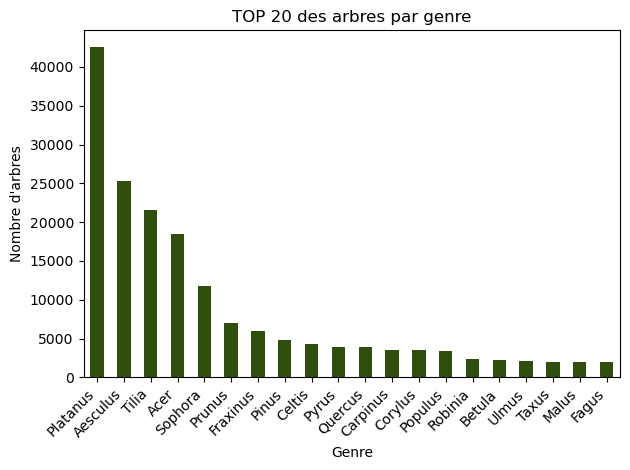

In [35]:
# Création de l'histogramme
valeurs_uniques_count_genre.head(20).plot(kind='bar', color='#314F0C')

plt.title("TOP 20 des arbres par genre")
plt.xlabel("Genre")
plt.ylabel("Nombre d'arbres")
plt.xticks(rotation=45, ha='right') # Rotation des étiquettes pour une meilleure lisibilité
plt.tight_layout() # Ajuste automatiquement les paramètres de la figure pour qu'elle s'inscrive dans la zone d'affichage

plt.show()

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.10.b - Résultats</h3>
<a class="anchor" id="partie3_10_2"></a>
</div>

On retrouve des valeurs presques identiques à la colonne "libelle_francais".

In [36]:
colonnes_gardees.append("genre")
colonnes_qualitatives.append("genre")

<div style="border: 1px solid RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.11 - Analyse exploratoire de la colonne "espece"</h3>
<a class="anchor" id="partie3_11"></a>
</div>

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.11.a - Analyse</h3>
<a class="anchor" id="partie3_11_1"></a>
</div>

Il y a 539 valeurs distinctes pour cette colonne.

In [37]:
# Affichage du nombre de valeurs pour chaque valeur unique de la colonne "espece"
valeurs_uniques_count_espece = arbres["espece"].value_counts(dropna=False)
valeurs_uniques_count_espece

x hispanica                  36409
hippocastanum                20039
japonica                     11822
n. sp.                        9063
tomentosa                     8962
                             ...  
polycarpa                        1
x gondouinii                     1
lusitanica subsp.azorica         1
oliveri                          1
delavayi subsp. potaninii        1
Name: espece, Length: 540, dtype: int64

In [38]:
valeurs_uniques_count_espece.head(20)

x hispanica       36409
hippocastanum     20039
japonica          11822
n. sp.             9063
tomentosa          8962
pseudoplatanus     7431
platanoides        6286
nigra              4947
x europaea         4707
x carnea           4417
australis          4121
cordata            3845
excelsior          3809
occidentalis       3462
betulus            3462
colurna            3381
calleryana         3125
platyphyllos       2918
orientalis         2756
serrulata          2401
Name: espece, dtype: int64

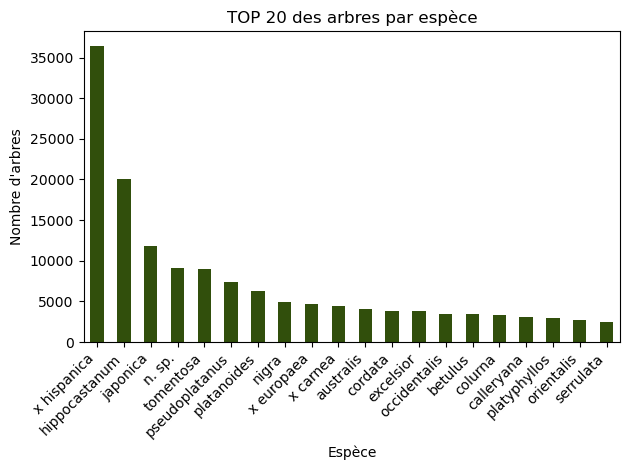

In [39]:
# Création de l'histogramme
valeurs_uniques_count_espece.head(20).plot(kind='bar', color='#314F0C')

plt.title("TOP 20 des arbres par espèce")
plt.xlabel("Espèce")
plt.ylabel("Nombre d'arbres")
plt.xticks(rotation=45, ha='right') # Rotation des étiquettes pour une meilleure lisibilité
plt.tight_layout() # Ajuste automatiquement les paramètres de la figure pour qu'elle s'inscrive dans la zone d'affichage

plt.show()

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.11.b - Résultats</h3>
<a class="anchor" id="partie3_11_2"></a>
</div>

On dénombre un très grand nombre d'arbres de la même espèces avec des espèces très fortement représentés (36 409 "x hispanica", 20 039 "hippocastanum", 11 822 "japonica", etc.), des espèces beaucoup moins représentées et des espèces très peu représentées (1 arbre).

In [40]:
colonnes_gardees.append("espece")
colonnes_qualitatives.append("espece")

<div style="border: 1px solid RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.12 - Analyse exploratoire de la colonne "variete"</h3>
<a class="anchor" id="partie3_12"></a>
</div>

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.12.a - Analyse</h3>
<a class="anchor" id="partie3_12_1"></a>
</div>

Il y a 436 valeurs distinctes pour cette colonne, mais 82% de valeurs nulles.

In [41]:
# Affichage du nombre de valeurs pour chaque valeur unique de la colonne "variete"
valeurs_uniques_count_variete = arbres["variete"].value_counts(dropna=False)
valeurs_uniques_count_variete

NaN                    163360
Baumannii'               4538
Briotii'                 2827
Euchlora'                2756
Chanticleer'             2595
                        ...  
Ferox'                      1
Schnee'                     1
Wageningeri'                1
Tristan'                    1
Grosse Pomme Noire'         1
Name: variete, Length: 437, dtype: int64

In [42]:
valeurs_uniques_count_variete.head(20)

NaN                             163360
Baumannii'                        4538
Briotii'                          2827
Euchlora'                         2756
Chanticleer'                      2595
Fastigiata'                       2483
Diversifolia'                     1748
Pallida'                          1494
Kanzan'                           1431
Italica'                          1283
Pissardii'                         902
Atropurpureum'                     628
Pendula'                           578
Greenspire'                        564
Crimson King'                      478
Pyramidalis'                       461
Sapporo Autumn Gold' RESISTA       434
Robusta'                           417
Raywood'                           371
RESISTA                            338
Name: variete, dtype: int64

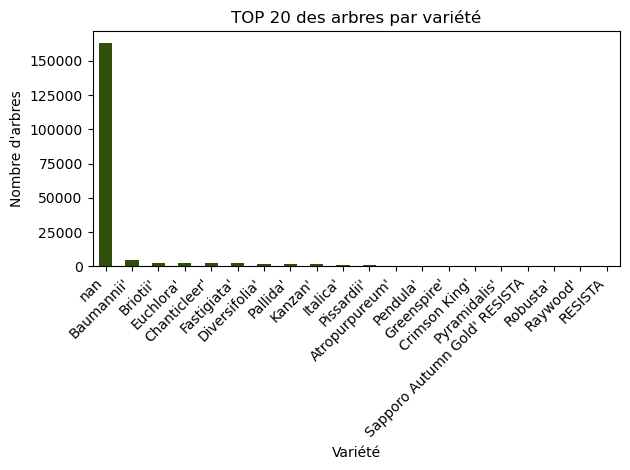

In [43]:
# Création de l'histogramme
valeurs_uniques_count_variete.head(20).plot(kind='bar', color='#314F0C')

plt.title("TOP 20 des arbres par variété")
plt.xlabel("Variété")
plt.ylabel("Nombre d'arbres")
plt.xticks(rotation=45, ha='right') # Rotation des étiquettes pour une meilleure lisibilité
plt.tight_layout() # Ajuste automatiquement les paramètres de la figure pour qu'elle s'inscrive dans la zone d'affichage

plt.show()

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.12.b - Résultats</h3>
<a class="anchor" id="partie3_12_2"></a>
</div>

On dénombre un très grand nombre de variétés avec des variétés très représentées (4 538 "baumannii", 2 827 "briotii", 2756 "euchlora", etc.), des variétés beaucoup moins représentées et des variétés très peu représentées (1 arbre).

In [44]:
colonnes_gardees.append("variete")
colonnes_qualitatives.append("variete")

<div style="border: 1px solid RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.13 - Analyse exploratoire de la colonne "circonference_cm"</h3>
<a class="anchor" id="partie3_13"></a>
</div>

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.13.a - Analyse</h3>
<a class="anchor" id="partie3_13_1"></a>
</div>

In [45]:
arbres["circonference_cm"].describe()

count    200137.000000
mean         83.380479
std         673.190213
min           0.000000
25%          30.000000
50%          70.000000
75%         115.000000
max      250255.000000
Name: circonference_cm, dtype: float64

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.13.b - Résultats</h3>
<a class="anchor" id="partie3_13_2"></a>
</div>

On constate déjà des valeurs erronées (valeur max à 250 255 cm).

In [46]:
colonnes_gardees.append("circonference_cm")
colonnes_quantitatives.append("circonference_cm")

<div style="border: 1px solid RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.14 - Analyse exploratoire de la colonne "hauteur_m"</h3>
<a class="anchor" id="partie3_14"></a>
</div>

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.14.a - Analyse</h3>
<a class="anchor" id="partie3_14_1"></a>
</div>

In [47]:
arbres["hauteur_m"].describe()

count    200137.000000
mean         13.110509
std        1971.217387
min           0.000000
25%           5.000000
50%           8.000000
75%          12.000000
max      881818.000000
Name: hauteur_m, dtype: float64

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.14.b - Résultats</h3>
<a class="anchor" id="partie3_14_2"></a>
</div>

On constate déjà des valeurs erronées (valeur max à 881 818 m).

In [48]:
colonnes_gardees.append("hauteur_m")
colonnes_quantitatives.append("hauteur_m")

<div style="border: 1px solid RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.15 - Analyse exploratoire de la colonne "stade_developpement"</h3>
<a class="anchor" id="partie3_15"></a>
</div>

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.15.a - Analyse</h3>
<a class="anchor" id="partie3_15_1"></a>
</div>

Il y a 4 valeurs distinctes pour cette colonne :
<ul>
    <li>A : Adulte</li>
    <li>JA : Jeune Adulte</li>
    <li>J : Jeune</li>
    <li>M : Mature</li>
</ul>

In [49]:
# Affichage du nombre de valeurs pour chaque valeur unique de la colonne "stade_developpement"
valeurs_uniques_count_stade_developpement = arbres["stade_developpement"].value_counts(dropna=False)
valeurs_uniques_count_stade_developpement

NaN    67205
A      64438
JA     35444
J      26937
M       6113
Name: stade_developpement, dtype: int64

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.15.b - Résultats</h3>
<a class="anchor" id="partie3_15_2"></a>
</div>

In [50]:
colonnes_gardees.append("stade_developpement")
colonnes_qualitatives.append("stade_developpement")

<div style="border: 1px solid RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.16 - Analyse exploratoire de la colonne "remarquable"</h3>
<a class="anchor" id="partie3_16"></a>
</div>

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.16.a - Analyse</h3>
<a class="anchor" id="partie3_16_1"></a>
</div>

Il y a 2 valeurs distinctes pour cette colonne :
<ul>
    <li>0 : NON</li>
    <li>1 : OUI</li>
</ul>

In [51]:
# Affichage du nombre de valeurs pour chaque valeur unique de la colonne "remarquable"
valeurs_uniques_count_remarquable = arbres["remarquable"].value_counts(dropna=False)
valeurs_uniques_count_remarquable

0.0    136855
NaN     63098
1.0       184
Name: remarquable, dtype: int64

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.16.b - Résultats</h3>
<a class="anchor" id="partie3_16_2"></a>
</div>

In [52]:
colonnes_gardees.append("remarquable")
colonnes_binaires.append("remarquable")

<div style="border: 1px solid RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.17 - Analyse exploratoire des colonnes "geo_point_2d_a" et "geo_point_2d_b"</h3>
<a class="anchor" id="partie3_17"></a>
</div>

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.17.a - Analyse</h3>
<a class="anchor" id="partie3_17_1"></a>
</div>

Les colonnes "geo_point_2d_a" et "geo_point_2d_b" correspondent aux coordonnées géographiques de chaque arbre.

"geo_point_2d_a" correspond à la latitude et "geo_point_2d_b" à la longitude.

In [53]:
arbres["geo_point_2d_a"].describe()

count    200137.000000
mean         48.854491
std           0.030234
min          48.742290
25%          48.835021
50%          48.854162
75%          48.876447
max          48.911485
Name: geo_point_2d_a, dtype: float64

In [54]:
arbres["geo_point_2d_b"].describe()

count    200137.000000
mean          2.348208
std           0.051220
min           2.210241
25%           2.307530
50%           2.351095
75%           2.386838
max           2.469759
Name: geo_point_2d_b, dtype: float64

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.17.b - Résultats</h3>
<a class="anchor" id="partie3_17_2"></a>
</div>

In [55]:
colonnes_gardees.append("geo_point_2d_a")
colonnes_quantitatives.append("geo_point_2d_a")

colonnes_gardees.append("geo_point_2d_b")
colonnes_quantitatives.append("geo_point_2d_b")

<div style="border: 1px solid RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.18 - Résultats de l'analyse exploratoire des colonnes</h3>
<a class="anchor" id="partie3_18"></a>
</div>

Il a déjà été décidé de ne pas garder certaines colonnes du dataframe initial car peu pertinentes ou sans données.

In [56]:
colonnes_gardees

['domanialite',
 'arrondissement',
 'libelle_francais',
 'genre',
 'espece',
 'variete',
 'circonference_cm',
 'hauteur_m',
 'stade_developpement',
 'remarquable',
 'geo_point_2d_a',
 'geo_point_2d_b']

Les colonnes "libelle_francais", "genre", "espece" et "variete" sont similaires ou redondantes, on peut garder uniquement la colonne "libelle_francais".

In [57]:
colonnes_gardees.remove("genre")
colonnes_gardees.remove("espece")
colonnes_gardees.remove("variete")

colonnes_gardees

['domanialite',
 'arrondissement',
 'libelle_francais',
 'circonference_cm',
 'hauteur_m',
 'stade_developpement',
 'remarquable',
 'geo_point_2d_a',
 'geo_point_2d_b']

In [58]:
arbres = arbres[colonnes_gardees]
arbres

,domanialite,arrondissement,libelle_francais,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,Jardin,PARIS 7E ARRDT,Marronnier,20,5,NaN,0.0,48.857620,2.320962
1,Jardin,PARIS 7E ARRDT,If,65,8,A,NaN,48.857656,2.321031
2,Jardin,PARIS 7E ARRDT,If,90,10,A,NaN,48.857705,2.321061
3,Jardin,PARIS 7E ARRDT,Erable,60,8,A,NaN,48.857722,2.321006
4,Jardin,PARIS 17E ARRDT,Arbre à miel,38,0,NaN,NaN,48.890435,2.315289
...,...,...,...,...,...,...,...,...,...
200132,Jardin,BOIS DE VINCENNES,NaN,0,0,NaN,0.0,48.821957,2.456264
200133,Jardin,BOIS DE VINCENNES,Arbre aux mouchoirs,0,0,NaN,0.0,48.823254,2.457935
200134,Jardin,BOIS DE VINCENNES,Peuplier,0,0,NaN,0.0,48.822907,2.457970
200135,Jardin,BOIS DE VINCENNES,Chêne,0,0,NaN,0.0,48.822522,2.455956


<div style="border: 1px solid RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">3.19 - Vérification des doublons</h3>
<a class="anchor" id="partie3_19"></a>
</div>

On va vérifier si des arbres ont les mêmes coordonnées géographiques afin de détecter de potentiels doublons.

In [59]:
# Identification des lignes en doublons basées sur "geo_point_2d_a" et "geo_point_2d_b"
doublons_coordonnees_geographiques = arbres[arbres.duplicated(subset=["geo_point_2d_a", "geo_point_2d_b"], keep=False)]

# Tri du dataframe par "geo_point_2d_a" croissant puis par "geo_point_2d_b" croissant
doublons_coordonnees_geographiques_sorted = doublons_coordonnees_geographiques.sort_values(by=["geo_point_2d_a", "geo_point_2d_b"])

# Affichez les doublons côte à côte
for i in range(0, len(doublons_coordonnees_geographiques_sorted), 2):
    # Sélectionnez deux lignes en doublons
    row1 = doublons_coordonnees_geographiques_sorted.iloc[i]
    row2 = doublons_coordonnees_geographiques_sorted.iloc[i + 1]

    # Affichez les deux lignes en doublons côte à côte
    print(pd.concat([row1, row2], axis=1).transpose())
    print("\n----------------------\n")

       domanialite     arrondissement libelle_francais circonference_cm  \
185479  Alignement  BOIS DE VINCENNES          Tilleul                0   
185480  Alignement  BOIS DE VINCENNES          Tilleul                0   

       hauteur_m stade_developpement remarquable geo_point_2d_a geo_point_2d_b  
185479         0                 NaN         0.0      48.829912       2.439665  
185480         0                 NaN         0.0      48.829912       2.439665  

----------------------

       domanialite     arrondissement libelle_francais circonference_cm  \
189133      Jardin  BOIS DE VINCENNES         Peuplier                0   
189134      Jardin  BOIS DE VINCENNES         Peuplier              100   

       hauteur_m stade_developpement remarquable geo_point_2d_a geo_point_2d_b  
189133         0                 NaN         0.0      48.836416       2.446277  
189134        22                   A         0.0      48.836416       2.446277  

----------------------

       doman

<ul>
    <li>lignes 185479 et 185473 : lignes en doublons, les arbres sont les mêmes ; on garde la ligne 185479</li>
    <li>lignes 189133 et 189134 : arbres identiques mais pour la ligne 189134 la circonférence, la hauteur et le stade de développement sont renseignés</li>
    <li>lignes 188329 et 193477 : 2 arbres différents ; on garde les deux lignes</li>
    <li>lignes 10099 et 10100 : 2 arbres identiques : on garde la ligne 10099</li>
    <li>lignes 188427 et 193587 : arbres identiques mais pour la ligne 188427 la circonférence, la hauteur et le stade de développement sont renseignés</li>
    <li>lignes 188426 et 193586 : arbres identiques mais pour la ligne 188426 la circonférence, la hauteur et le stade de développement sont renseignés</li>
    <li>lignes 188269 et 188304 : les lignes sont quasiment identiques sauf pour la circonférence et la hauteur) ; on garde la ligne 188269</li>
    <li>lignes 193007 et 190017 : 2 arbres différents ; on garde les deux lignes</li>
    <li>lignes 12796 et 76387 : 2 arbres identiques : on garde la ligne 12796</li>
    <li>lignes 12795 et 76386 : 2 arbres identiques : on garde la ligne 12795</li>
    <li>lignes 12794 et 76385 : 2 arbres identiques : on garde la ligne 12794</li>
</ul>

In [60]:
id_a_supprimer = [185473, 189133, 10100, 193587, 193586, 188304, 76387, 76386, 76385]
# Utilisation de la méthode isin() pour filtrer les lignes à supprimer
arbres = arbres.drop(id_a_supprimer)
arbres = arbres.reset_index(drop=True)

In [61]:
# Affichage des dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(arbres.shape[0])) 
print("Le tableau comporte {} colonne(s)".format(arbres.shape[1]))

Le tableau comporte 200128 observation(s) ou article(s)
Le tableau comporte 9 colonne(s)


In [62]:
arbres.head(10)

,domanialite,arrondissement,libelle_francais,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,Jardin,PARIS 7E ARRDT,Marronnier,20,5,NaN,0.0,48.857620,2.320962
1,Jardin,PARIS 7E ARRDT,If,65,8,A,NaN,48.857656,2.321031
2,Jardin,PARIS 7E ARRDT,If,90,10,A,NaN,48.857705,2.321061
3,Jardin,PARIS 7E ARRDT,Erable,60,8,A,NaN,48.857722,2.321006
4,Jardin,PARIS 17E ARRDT,Arbre à miel,38,0,NaN,NaN,48.890435,2.315289
5,Jardin,PARIS 17E ARRDT,Arbre à miel,38,0,NaN,NaN,48.890470,2.315228
6,Jardin,PARIS 17E ARRDT,Arbre à miel,37,0,NaN,NaN,48.890504,2.315168
7,Jardin,PARIS 16E ARRDT,Platane,260,17,NaN,NaN,48.876722,2.280222
8,Jardin,PARIS 16E ARRDT,Sophora,145,14,A,0.0,48.871990,2.275814
9,Jardin,PARIS 16E ARRDT,Sophora,135,10,A,0.0,48.872046,2.275752


In [63]:
# Consulter le nombre de colonnes
# La nature des données dans chacune des colonnes
# Le nombre de valeurs présentes dans chacune des colonnes
arbres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200128 entries, 0 to 200127
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   domanialite          200127 non-null  object 
 1   arrondissement       200128 non-null  object 
 2   libelle_francais     198631 non-null  object 
 3   circonference_cm     200128 non-null  int64  
 4   hauteur_m            200128 non-null  int64  
 5   stade_developpement  132931 non-null  object 
 6   remarquable          137034 non-null  float64
 7   geo_point_2d_a       200128 non-null  float64
 8   geo_point_2d_b       200128 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 13.7+ MB


<div style="background-color: RGB(89, 152, 26); text-align: center;" >
<h2 style="margin: auto; padding: 20px; color: white">Partie 4 - Vérification des valeurs aberrantes et nulles</h2>
<a class="anchor" id="partie4"></a>
</div>

<div style="border: 1px solid RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">4.1 - Vérification des valeurs nulles</h3>
<a class="anchor" id="partie4_1"></a>
</div>

Afin de vérifier le nombre de valeurs nulles pour les colonnes "circonference_cm" et "hauteur_m", on va remplacer les valuers égale à 0 par NaN car on considère que ce sont des valeurs manquantes.

In [64]:
# Remplacement des valeurs égales à 0 dans les colonnes "circonference_cm" et "hauteur_m"
arbres['circonference_cm'] = arbres['circonference_cm'].replace(0, None)
arbres['hauteur_m'] = arbres['hauteur_m'].replace(0, None)

In [65]:
# Vérification du nombre de valeurs nulles
arbres.isnull().sum()

domanialite                1
arrondissement             0
libelle_francais        1497
circonference_cm       25862
hauteur_m              39214
stade_developpement    67197
remarquable            63094
geo_point_2d_a             0
geo_point_2d_b             0
dtype: int64

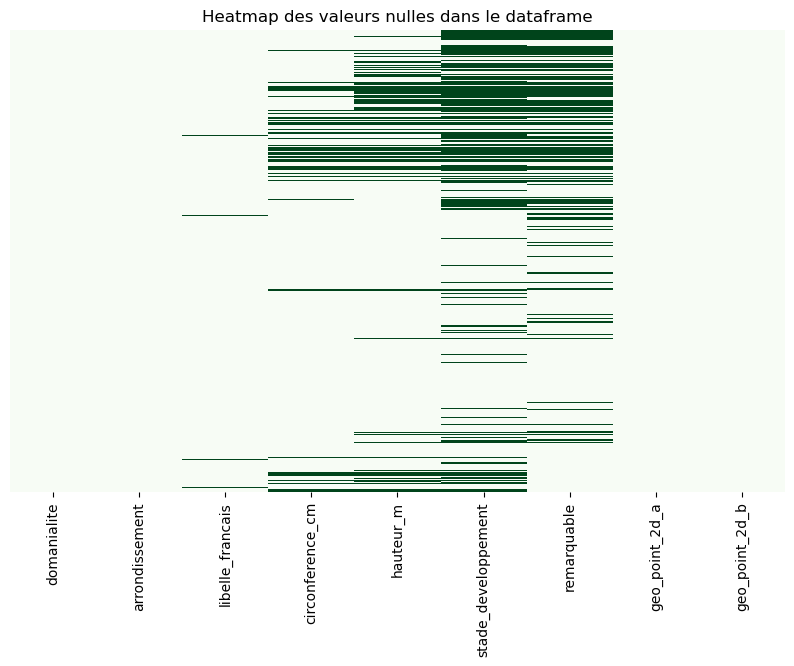

In [66]:
# Création d'une heatmap des valeurs nulles
plt.figure(figsize=(10, 6))
sns.heatmap(arbres.isnull(), cmap="Greens", cbar=False, yticklabels=False)

# Ajout d'une légende
plt.title("Heatmap des valeurs nulles dans le dataframe")
plt.show()

Il y a 6 colonnes avec des valeurs égales à NaN (4 qualitatives et 2 quantitatives) :
<ul>
    <li>domanialite</li>
    <li>libelle_francais</li>
    <li>stade_developpement</li>
    <li>remarquable</li>
    <li>circonference_cm</li>
    <li>hauteur_m</li>
</ul>

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">4.1.a - Valeurs manquantes pour la variable "domanialite"</h3>
<a class="anchor" id="partie4_1_1"></a>
</div>

In [67]:
# Filtrage des lignes où la colonne "domanialite" est égale à NaN
lignes_nan_domanialite = arbres[arbres["domanialite"].isna()]

lignes_nan_domanialite

,domanialite,arrondissement,libelle_francais,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
197230,NaN,PARIS 20E ARRDT,Chimonanthe,35,4,JA,0.0,48.849547,2.41419


In [68]:
# Affichage de la ligne depuis le dataframe initial non modifié
ligne_197230 = df_arbres.iloc[197230]
ligne_197230

id                                                               2020902
type_emplacement                                                   Arbre
domanialite                                                       Jardin
arrondissement                                           PARIS 20E ARRDT
complement_addresse                                                  NaN
numero                                                               NaN
lieu                   JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...
id_emplacement                                                    104013
libelle_francais                                     Laurier du Portugal
genre                                                             Prunus
espece                                                        lusitanica
variete                                                              NaN
circonference_cm                                                      35
hauteur_m                                          

On va rechercher dans le dataframe initial non modifié si on retrouve des lignes avec le même lieu et voir quelle est la dominialité associée. 

In [69]:
# Vérification si la colonne "lieu" contient "JARDINS D IMMEUBLES PORTE DE VINCENNES NORD"
contient_texte = df_arbres["lieu"].str.contains("JARDINS D IMMEUBLES PORTE DE VINCENNES NORD", case=False)

# Filtrage des lignes où le texte est trouvé
lignes_contenant_texte = df_arbres[contient_texte]

# Affichage des lignes
lignes_contenant_texte

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
10470,112685,Arbre,Jardin,PARIS 20E ARRDT,NaN,NaN,JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...,105004,Pommier à fleurs,Malus,trilobata,NaN,35,4,JA,0.0,48.849399,2.414360
10471,112686,Arbre,Jardin,PARIS 20E ARRDT,NaN,NaN,JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...,105005,Peuplier,Populus,alba,Pyramidalis',330,18,M,0.0,48.849375,2.414330
10472,112687,Arbre,Jardin,PARIS 20E ARRDT,NaN,NaN,JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...,105003,Sophora,Sophora,japonica,NaN,120,12,A,0.0,48.849446,2.414183
10646,112915,Arbre,Jardin,PARIS 20E ARRDT,NaN,NaN,JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...,102002,Tilleul,Tilia,platyphyllos,NaN,140,16,A,0.0,48.849841,2.413391
10647,112916,Arbre,Jardin,PARIS 20E ARRDT,NaN,NaN,JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...,102003,Tilleul,Tilia,platyphyllos,NaN,120,16,A,0.0,48.849874,2.413448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197248,2020920,Arbre,Jardin,PARIS 20E ARRDT,NaN,NaN,JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...,201007,Prunus Fleur n. sp.,Prunus,Fleur n. sp.,NaN,15,4,J,0.0,48.849770,2.413760
197249,2020921,Arbre,Jardin,PARIS 20E ARRDT,NaN,NaN,JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...,201012,Pommier à fruits,Malus,Fruit n. sp.,NaN,20,4,J,0.0,48.849658,2.413831
197250,2020922,Arbre,Jardin,PARIS 20E ARRDT,NaN,NaN,JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...,202003,Prunus Fleur n. sp.,Prunus,Fleur n. sp.,NaN,20,3,J,0.0,48.849599,2.413899
197251,2020923,Arbre,Jardin,PARIS 20E ARRDT,NaN,NaN,JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...,201006,Prunus Fleur n. sp.,Prunus,Fleur n. sp.,NaN,25,3,J,0.0,48.849759,2.413875


In [70]:
# Vérification de la dominialite pour les lignes du même lieu
verification_domanialite = lignes_contenant_texte["domanialite"].value_counts(dropna=False)
verification_domanialite

Jardin    81
NaN        1
Name: domanialite, dtype: int64

Toutes les autres lignes correspondant au même lieu ont la domanialité égale à "Jardin".

On peut donc remplacer la domanialité nulle par "Jardin".

In [71]:
# Modification de la valeur de la colonne "domanialite" pour la ligne 197230
arbres.at[197230, 'domanialite'] = 'Jardin'

In [72]:
# Filtrage des lignes où la colonne "domanialite" est égale à NaN
lignes_nan_domanialite = arbres[arbres["domanialite"].isna()]

lignes_nan_domanialite

,domanialite,arrondissement,libelle_francais,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b


<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">4.1.b - Valeurs manquantes pour la variable "libelle_francais"</h3>
<a class="anchor" id="partie4_1_2"></a>
</div>

Pour cette variable, nous avons 1497 valeurs manquantes.

Il est difficile de prédire l'espèce d'un arbre en fonction des autres variables, nous allons donc créer une valeur "Inconnu" pour remplacer les valeurs manquantes.

In [73]:
# Remplacement des valeurs NaN par "Inconnu" dans la colonne "libelle_francais"
arbres["libelle_francais"] = arbres["libelle_francais"].fillna("Inconnu")

In [74]:
# Filtrage des lignes où la colonne "libelle_francais" est égale à NaN
lignes_nan_libelle_francais = arbres[arbres["libelle_francais"].isna()]

lignes_nan_libelle_francais

,domanialite,arrondissement,libelle_francais,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b


<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">4.1.c - Valeurs manquantes pour la variable "remarquable"</h3>
<a class="anchor" id="partie4_1_3"></a>
</div>

In [75]:
# Comptage du nombre de lignes où "remarquable" est égal à 1
nombre_remarquable_1 = (arbres["remarquable"] == 1).sum()

print(nombre_remarquable_1)

184


D'après le site opendata, on trouve un jeu de données pour lesquels il y a 188 arbres remarquables à Paris.

Source : https://opendata.paris.fr/explore/dataset/arbresremarquablesparis/table/

On peut donc modifier toutes les valeurs manquantes par 0 en considérant que ces arbres là n'ont pas été considérés comme remarquables.

In [76]:
# Remplacement des valeurs NaN par "0" dans la colonne "remarquable"
arbres["remarquable"] = arbres["remarquable"].fillna(0)

In [77]:
# Filtrage des lignes où la colonne "remarquable" est égale à NaN
lignes_nan_remarquable = arbres[arbres["remarquable"].isna()]

lignes_nan_remarquable

,domanialite,arrondissement,libelle_francais,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b


<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">4.1.d - Valeurs manquantes pour la variable "circonference_cm"</h3>
<a class="anchor" id="partie4_1_4"></a>
</div>

In [78]:
arbres["circonference_cm"].describe()

count     174266
unique       530
top           20
freq        9711
Name: circonference_cm, dtype: int64

D'après le lien vers le site opendata donné plus haut, la circonference maximum (en cm) d'un arbre remarquable est de 740 cm. On va appliquer une marge d'erreur de 10%, ce qui donne environ 800 cm pour la circonference la plus élevée.

In [79]:
# Création d'une "constante" pour la valeur max de "circonference_cm"
CIRCONFERENCE_MAX = 800.0

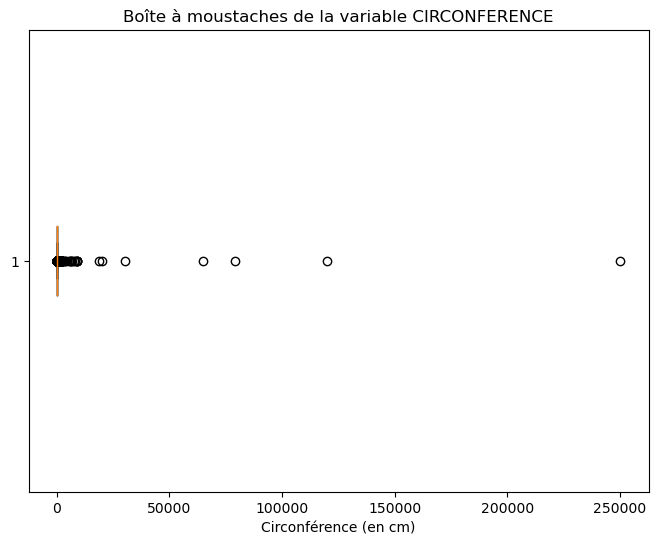

In [80]:
# Création d'une boîte à moustaches pour la variable "circonference_cm"
plt.figure(figsize=(8, 6))
plt.boxplot(arbres["circonference_cm"].dropna(), vert=False)
plt.xlabel("Circonférence (en cm)")
plt.title("Boîte à moustaches de la variable CIRCONFERENCE")
plt.show()

La boite à moustaches est illisible en l'état.

In [81]:
# Comptage du nombre de lignes où "circonference_cm" est supérieur à 800
nombre_lignes_circonference_sup_800 = (arbres['circonference_cm'] > 800).sum()

print(nombre_lignes_circonference_sup_800)

77


Le nombre de lignes n'est pas élevé par rapport aux nombres de lignes de notre dataframe (0.04%), on peut donc remplacer les valeurs supérieurs à 800 par CIRCONFERENCE_MAX.

In [82]:
# Remplacement des valeurs supérieures à 800 par CIRCONFERENCE_MAX dans la colonne "circonference_cm"
arbres["circonference_cm"] = arbres["circonference_cm"].apply(lambda x: min(x, CIRCONFERENCE_MAX) if pd.notna(x) else x)

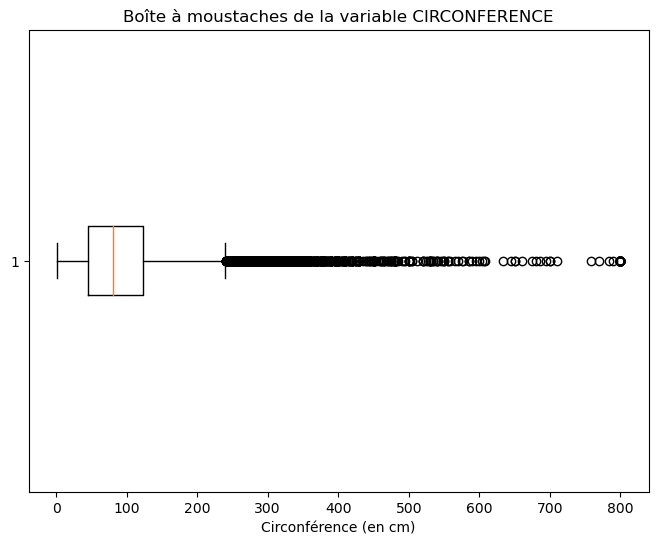

In [83]:
# Création d'une boîte à moustaches pour la variable "circonference_cm"
plt.figure(figsize=(8, 6))
plt.boxplot(arbres["circonference_cm"].dropna(), vert=False)
plt.xlabel("Circonférence (en cm)")
plt.title("Boîte à moustaches de la variable CIRCONFERENCE")
plt.show()

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">4.1.e - Valeurs manquantes pour la variable "hauteur_m"</h3>
<a class="anchor" id="partie4_1_5"></a>
</div>

In [84]:
arbres["hauteur_m"].describe()

count     160914
unique       142
top           10
freq       28632
Name: hauteur_m, dtype: int64

D'après le lien vers le site opendata donné plus haut, la hauteur maximum (en m) d'un arbre remarquable est de 45 m. On va appliquer une marge d'erreur de 10%, ce qui donne environ 50 m pour la hauteur la plus élevée.

In [85]:
# Création d'une "constante" pour la valeur max de "hauteur_m"
HAUTEUR_MAX = 50

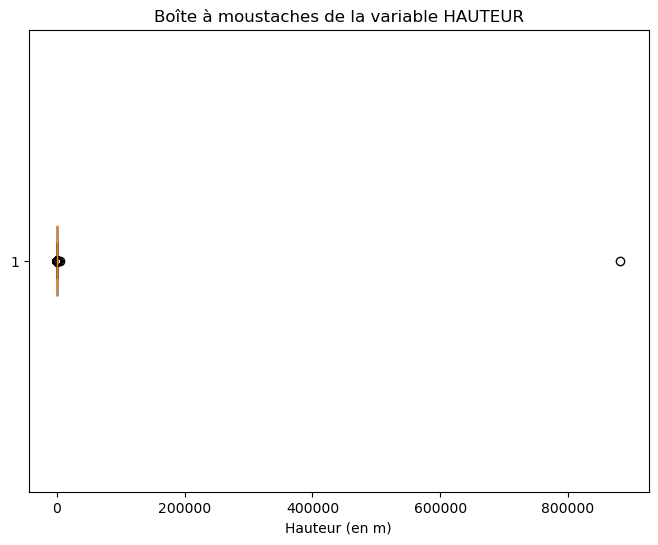

In [86]:
# Création d'une boîte à moustaches pour la variable "hauteur_m"
plt.figure(figsize=(8, 6))
plt.boxplot(arbres["hauteur_m"].dropna(), vert=False)
plt.xlabel("Hauteur (en m)")
plt.title("Boîte à moustaches de la variable HAUTEUR")
plt.show()

La boite à moustaches est illisible en l'état.

In [87]:
# Comptage du nombre de lignes où "hauteur_m" est supérieur à 50
nombre_lignes_hauteur_sup_50 = (arbres['hauteur_m'] > 50).sum()

print(nombre_lignes_hauteur_sup_50)

445


Le nombre de lignes n'est pas élevé par rapport aux nombres de lignes de notre dataframe (0.22%), on peut donc remplacer les valeurs supérieurs à 50 par HAUTEUR_MAX.

In [88]:
# Remplacement des valeurs supérieures à 50 par HAUTEUR_MAX dans la colonne "hauteur_m"
arbres["hauteur_m"] = arbres["hauteur_m"].apply(lambda x: min(x, HAUTEUR_MAX) if pd.notna(x) else x)

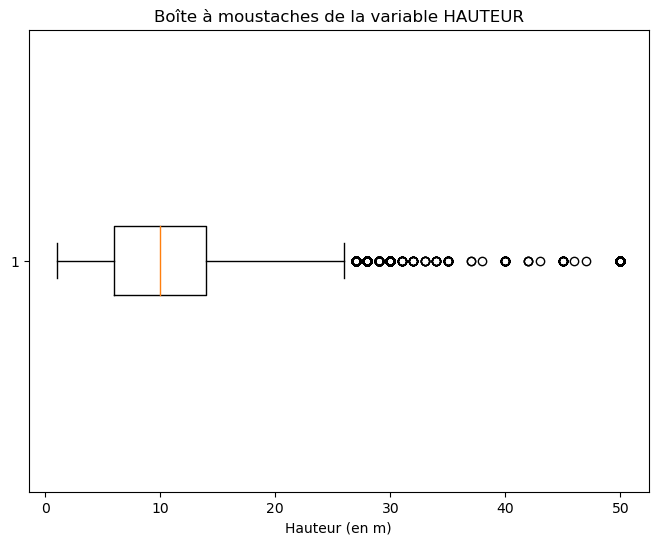

In [89]:
# Création d'une boîte à moustaches pour la variable "hauteur_m"
plt.figure(figsize=(8, 6))
plt.boxplot(arbres["hauteur_m"].dropna(), vert=False)
plt.xlabel("Hauteur (en m)")
plt.title("Boîte à moustaches de la variable HAUTEUR")
plt.show()

<div style="border-bottom: 1px dashed RGB(89, 152, 26);" >
<h3 style="margin: auto; padding: 20px; color: RGB(89, 152, 26); ">4.1.f - Valeurs manquantes pour la variable "stade_developpement"</h3>
<a class="anchor" id="partie4_1_6"></a>
</div>

In [90]:
arbres["stade_developpement"].value_counts(dropna=False)

NaN    67197
A      64437
JA     35444
J      26937
M       6113
Name: stade_developpement, dtype: int64

In [91]:
arbres["stade_developpement"].value_counts(dropna=False, normalize=True)

NaN    0.335770
A      0.321979
JA     0.177107
J      0.134599
M      0.030545
Name: stade_developpement, dtype: float64

In [92]:
df_original = arbres[arbres['stade_developpement'].notna()]

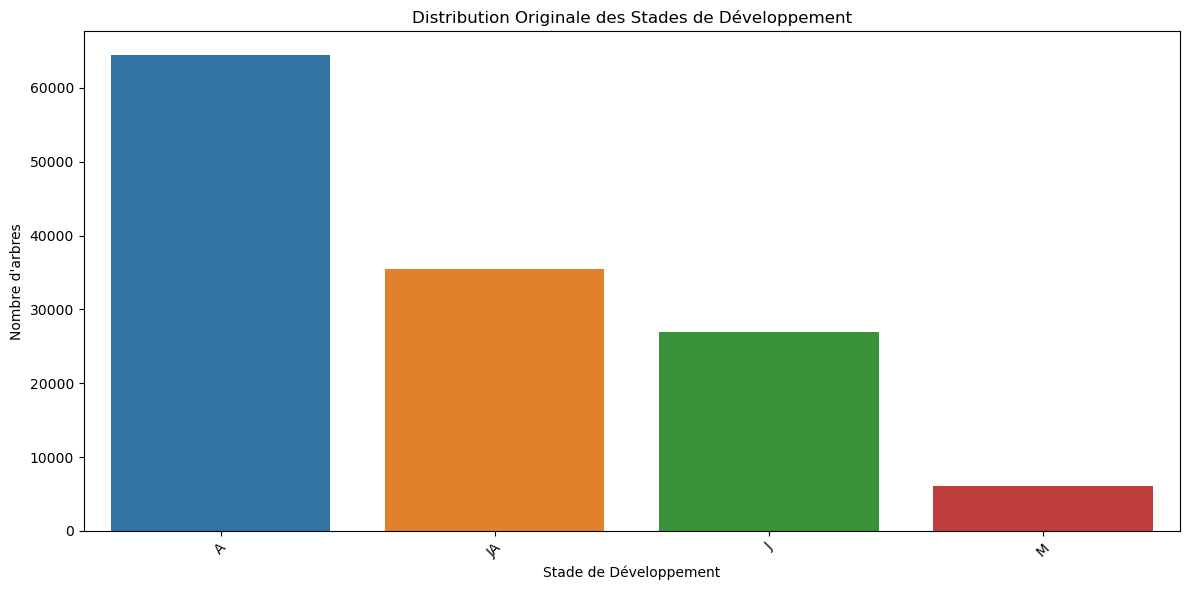

In [93]:
# Graphique de distribution pour les valeurs originales
plt.figure(figsize=(12, 6))
sns.countplot(data=df_original, x='stade_developpement', order=df_original['stade_developpement'].value_counts().index)
plt.title('Distribution Originale des Stades de Développement')
plt.xticks(rotation=45)
plt.ylabel('Nombre d\'arbres')
plt.xlabel('Stade de Développement')

plt.tight_layout()
plt.show()

Le nombre de valeurs nulles pour la colonne "stade_developpement" représente presque 34% des valeurs pour cette colonne.

On va remplacer les valeurs manquantes en utilisant un algorithme KNN. 

In [94]:
# Encodeur pour les variables catégorielles si nécessaire
le = LabelEncoder()

# Prétraitement : exemple de normalisation des données numériques
scaler = StandardScaler()
features = ['circonference_cm', 'hauteur_m']  # Exemple de caractéristiques
arbres.dropna(subset=features, inplace=True)  # Suppression des lignes avec des valeurs manquantes dans les caractéristiques
arbres[features] = scaler.fit_transform(arbres[features])

# Séparation des données en fonction de la disponibilité de 'stade_developpement'
known_stade = arbres[arbres['stade_developpement'].notna()]
unknown_stade = arbres[arbres['stade_developpement'].isna()]

# Préparation des ensembles de données pour l'entraînement
X_known = known_stade[features]
y_known = le.fit_transform(known_stade['stade_developpement'])

In [95]:
# Configuration des paramètres pour la recherche
param_grid = {'n_neighbors': np.arange(1, 10)}

# Initialiser le modèle KNN
knn = KNeighborsClassifier()

# Initialiser GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy') 

# Fit le modèle sur les données
grid_search.fit(X_known, y_known)

# Le meilleur nombre de voisins
best_k = grid_search.best_params_['n_neighbors']
print(f"Le nombre optimal de voisins est : {best_k}")

# Performance du modèle avec le meilleur k
best_score = grid_search.best_score_
print(f"Meilleure score d'exactitude avec k={best_k} : {best_score}")

Le nombre optimal de voisins est : 9
Meilleure score d'exactitude avec k=9 : 0.665686724850712


In [96]:
# Entraînement du modèle KNN
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_known, y_known)

# Prédiction des valeurs manquantes
X_unknown = unknown_stade[features]
predicted_stade = knn.predict(X_unknown)
predicted_stade_labels = le.inverse_transform(predicted_stade)

# Remplir les valeurs manquantes dans le DataFrame original
arbres.loc[arbres['stade_developpement'].isna(), 'stade_developpement'] = predicted_stade_labels

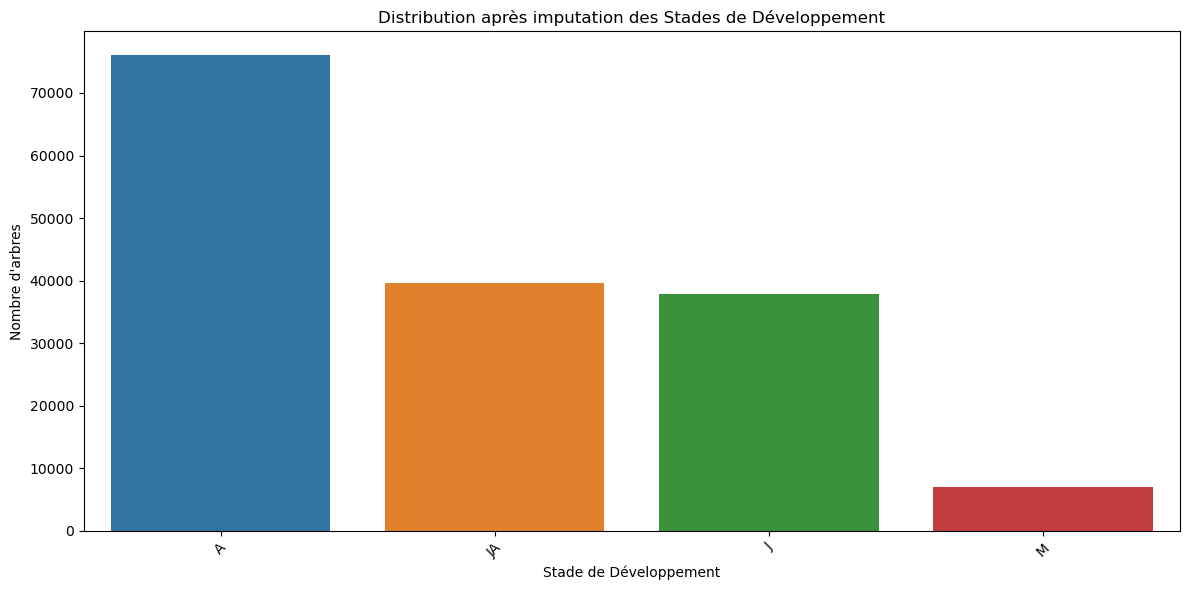

In [97]:
# Graphique de distribution pour les valeurs imputées
plt.figure(figsize=(12, 6))
sns.countplot(data=arbres, x='stade_developpement', order=arbres['stade_developpement'].value_counts().index)
plt.title('Distribution après imputation des Stades de Développement')
plt.xticks(rotation=45)
plt.ylabel('Nombre d\'arbres')
plt.xlabel('Stade de Développement')

plt.tight_layout()
plt.show()

In [98]:
arbres["stade_developpement"].value_counts(dropna=False)

A     76048
JA    39638
J     37908
M      6954
Name: stade_developpement, dtype: int64

In [99]:
arbres["stade_developpement"].value_counts(dropna=False, normalize=True)

A     0.473678
JA    0.246892
J     0.236116
M     0.043314
Name: stade_developpement, dtype: float64

<div style="background-color: RGB(89, 152, 26); text-align: center;" >
<h2 style="margin: auto; padding: 20px; color: white">Partie 5 - Visualisations graphiques des données</h2>
<a class="anchor" id="partie5"></a>
</div>

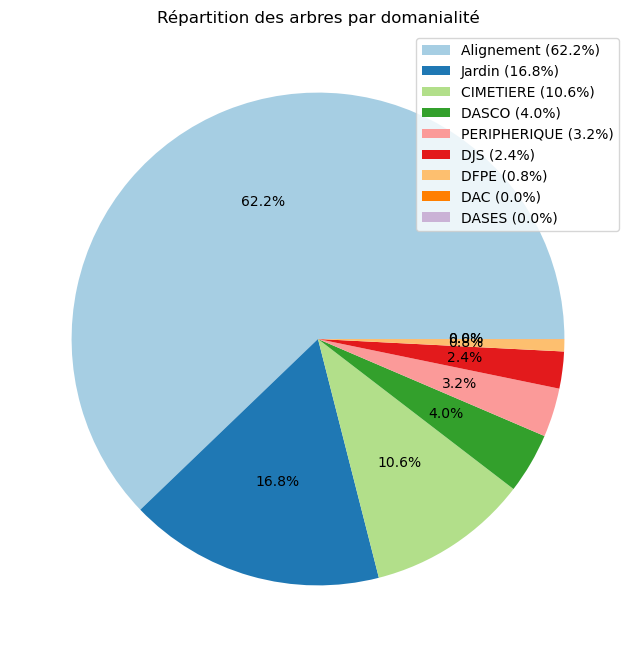

In [100]:
# Calcul de la récurrence de la variable "domanialite"
recurrence_domanialite = arbres["domanialite"].value_counts()

# Création d'un pie chart
plt.figure(figsize=(8, 8))
_, _, autopcts = plt.pie(recurrence_domanialite, autopct="%1.1f%%", colors=plt.cm.Paired.colors)

# Ajout d'une légende en haut à droite
plt.legend(recurrence_domanialite.index, loc="upper right", bbox_to_anchor=(1, 1))

# Ajout des labels dans la légende
for label, autopct in zip(plt.gca().get_legend().get_texts(), autopcts):
    label.set_text(f'{label.get_text()} ({autopct.get_text()})')

# Titre du pie chart
plt.title("Répartition des arbres par domanialité")

# Affichage du pie chart
plt.show()

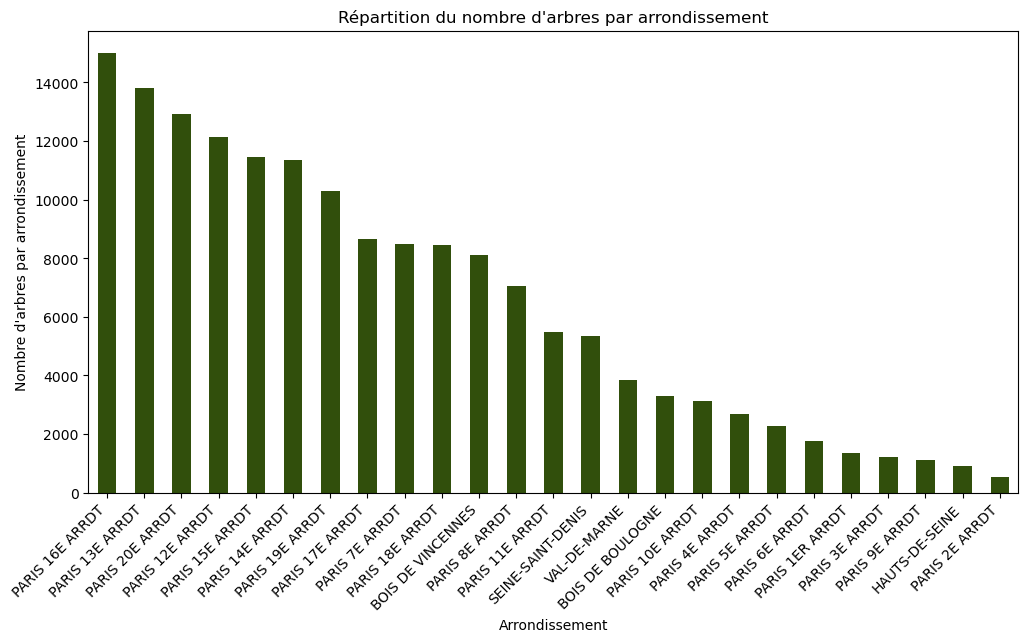

In [101]:
# Calcul de la récurrence de la variable "arrondissement"
recurrence_arrondissement = arbres["arrondissement"].value_counts()

# Création d'un bar chart
plt.figure(figsize=(12, 6))
recurrence_arrondissement.plot(kind="bar", color="#314F0C")
plt.xlabel("Arrondissement")
plt.ylabel("Nombre d'arbres par arrondissement")
plt.title("Répartition du nombre d'arbres par arrondissement")
plt.xticks(rotation=45, ha='right')
plt.show()

In [102]:
# Récupération des effectifs pour chaque valeur de "libelle_francais"
effectifs = arbres["libelle_francais"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["libelle_francais"]) # création du tableau à partir des modalités
tab["Nombre"] = effectifs.values
tab["Fréquence (en %)"] = round(tab["Nombre"] / len(arbres)*100, 2)

# Tri du dataframe par le nombre dans l'ordre décroissant
tab_sorted = tab.sort_values(by='Nombre', ascending=False)

# Sélection des 10 premières lignes
top_10 = tab_sorted.head(10)

# Calcul de la somme des valeurs restantes
reste = tab_sorted.iloc[10:].sum()

# Création d'une nouvelle ligne pour "Autre"
autre_row = pd.DataFrame({'libelle_francais': ['Autre'], 'Nombre': [reste['Nombre']], 'Fréquence (en %)': [reste['Fréquence (en %)']]})

# Concaténation des 10 premières lignes avec la nouvelle ligne "Autre"
top_10_lf = pd.concat([top_10, autre_row], ignore_index=True)

top_10_lf

,libelle_francais,Nombre,Fréquence (en %)
0,Platane,39311,24.49
1,Marronnier,22806,14.21
2,Tilleul,17496,10.90
3,Erable,12454,7.76
4,Sophora,10446,6.51
5,Frêne,3466,2.16
6,Micocoulier,3443,2.14
7,Peuplier,2848,1.77
8,Noisetier de Byzance,2761,1.72
9,Chêne,2738,1.71


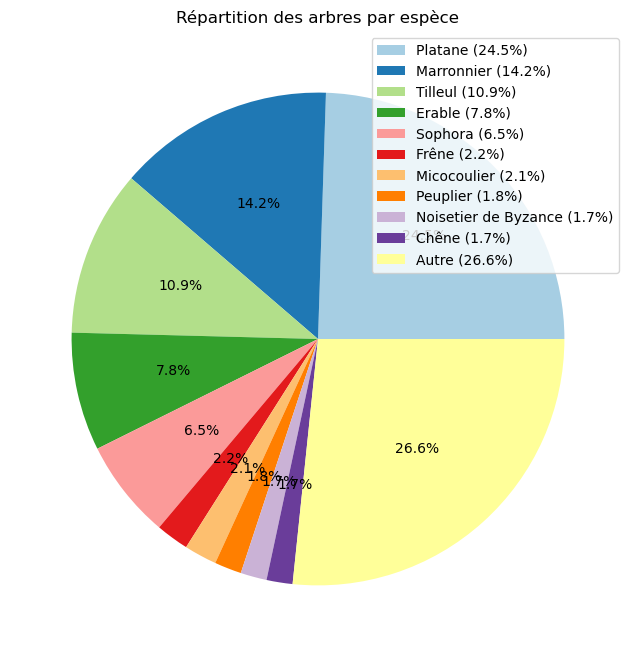

In [103]:
# Création d'un pie chart
plt.figure(figsize=(8, 8))
_, _, autopcts = plt.pie(top_10_lf["Nombre"], autopct="%1.1f%%", colors=plt.cm.Paired.colors)

# Ajout d'une légende en haut à droite
plt.legend(top_10_lf["libelle_francais"], loc="upper right", bbox_to_anchor=(1, 1))

# Ajout des labels dans la légende
for label, autopct in zip(plt.gca().get_legend().get_texts(), autopcts):
    label.set_text(f'{label.get_text()} ({autopct.get_text()})')

# Titre du pie chart
plt.title("Répartition des arbres par espèce")

# Affichage du pie chart
plt.show()

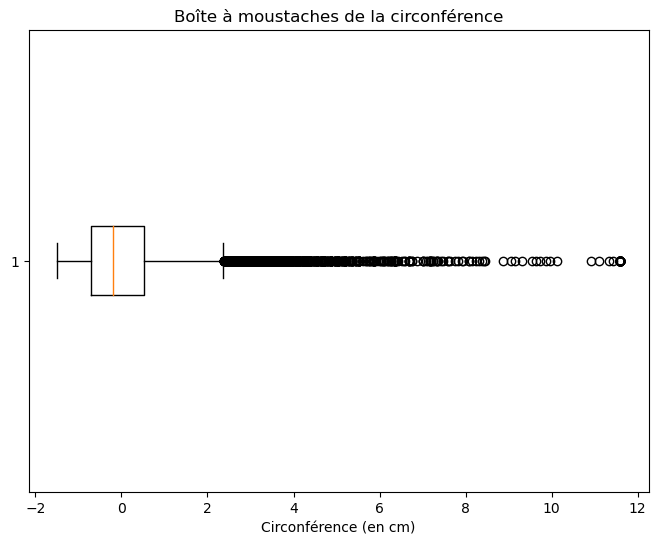

In [104]:
# Création d'une boîte à moustaches pour la variable "circonference_cm"
plt.figure(figsize=(8, 6))
plt.boxplot(arbres["circonference_cm"].dropna(), vert=False)
plt.xlabel("Circonférence (en cm)")
plt.title("Boîte à moustaches de la circonférence")
plt.show()

Text(0, 0.5, "Nombre d'arbres")

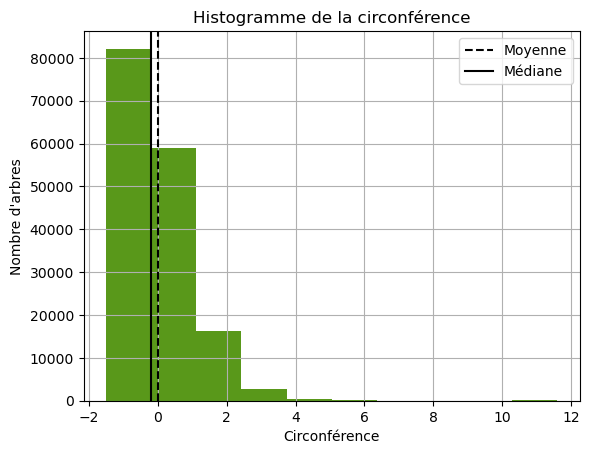

In [105]:
# Calcul de la moyenne de la variable "circonference_cm"
moyenne_circonference = arbres["circonference_cm"].mean()

# Calcul de la médiane de la variable "circonference_cm"
mediane_circonference = arbres["circonference_cm"].median()

arbres["circonference_cm"].hist(color="#59981A")

plt.axvline(moyenne_circonference, color="black", linestyle="--")
plt.axvline(mediane_circonference, color="black", linestyle="-")
plt.legend({"Moyenne":moyenne_circonference,"Médiane":mediane_circonference})

plt.title("Histogramme de la circonférence")
plt.xlabel("Circonférence")
plt.ylabel("Nombre d'arbres")

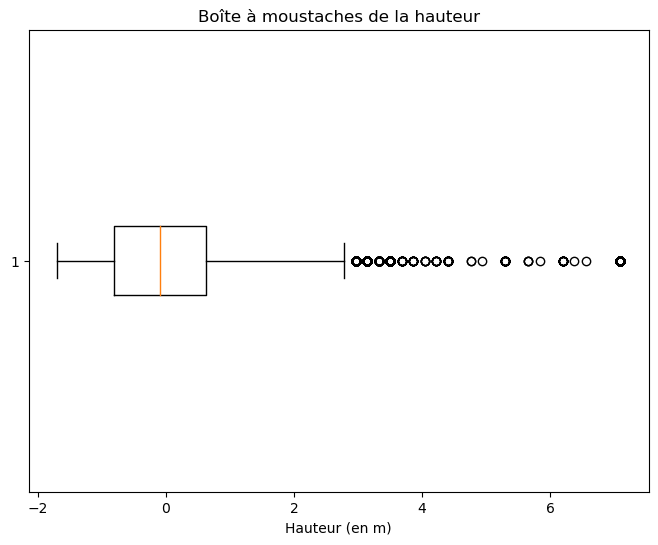

In [106]:
# Création d'une boîte à moustaches pour la variable "hauteur_m"
plt.figure(figsize=(8, 6))
plt.boxplot(arbres["hauteur_m"].dropna(), vert=False)
plt.xlabel("Hauteur (en m)")
plt.title("Boîte à moustaches de la hauteur")
plt.show()

Text(0, 0.5, "Nombre d'arbres")

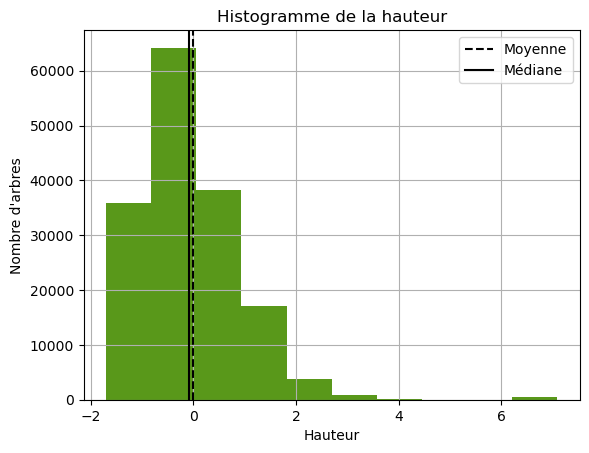

In [107]:
# Calcul de la moyenne de la variable "hauteur_m"
moyenne_hauteur = arbres["hauteur_m"].mean()

# Calcul de la médiane de la variable "hauteur_m"
mediane_hauteur = arbres["hauteur_m"].median()

arbres["hauteur_m"].hist(color="#59981A")

plt.axvline(moyenne_hauteur, color="black", linestyle="--")
plt.axvline(mediane_hauteur, color="black", linestyle="-")
plt.legend({"Moyenne":moyenne_hauteur,"Médiane":mediane_hauteur})

plt.title("Histogramme de la hauteur")
plt.xlabel("Hauteur")
plt.ylabel("Nombre d'arbres")

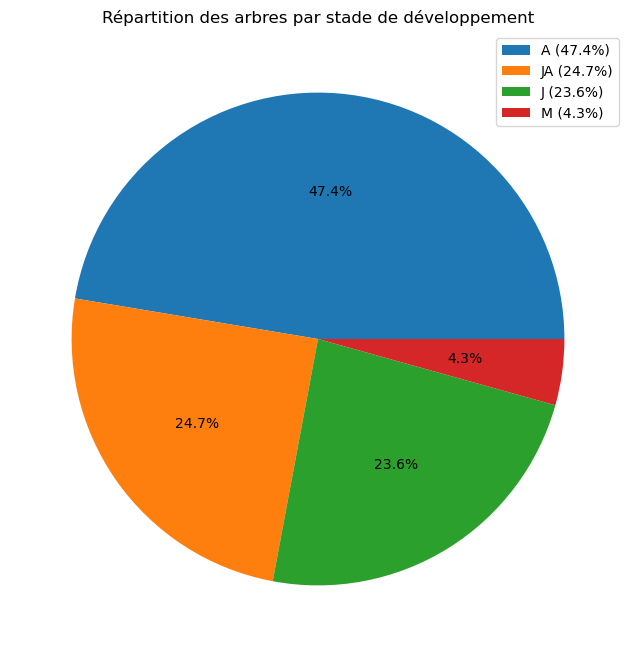

In [108]:
# Calcul de la récurrence de la variable "stade_developpement"
recurrence_stade_developpement = arbres["stade_developpement"].value_counts()

# Création d'un pie chart
plt.figure(figsize=(8, 8))
_, _, autopcts = plt.pie(recurrence_stade_developpement, autopct="%1.1f%%")

# Ajout d'une légende en haut à droite
plt.legend(recurrence_stade_developpement.index, loc="upper right", bbox_to_anchor=(1, 1))

# Ajout des labels dans la légende
for label, autopct in zip(plt.gca().get_legend().get_texts(), autopcts):
    label.set_text(f'{label.get_text()} ({autopct.get_text()})')

# Titre du pie chart
plt.title("Répartition des arbres par stade de développement")

# Affichage du pie chart
plt.show()

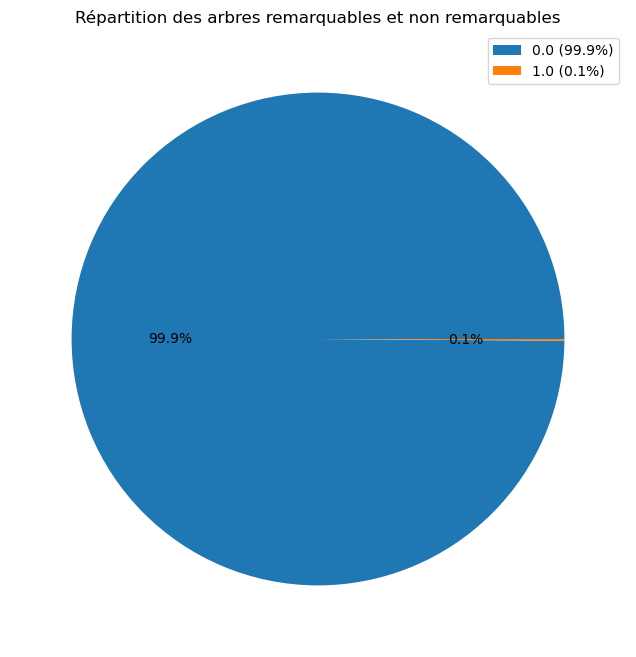

In [109]:
# Calcul de la récurrence de la variable "remarquable"
recurrence_remarquable = arbres["remarquable"].value_counts()

# Création d'un pie chart
plt.figure(figsize=(8, 8))
_, _, autopcts = plt.pie(recurrence_remarquable, autopct="%1.1f%%")

# Ajout d'une légende en haut à droite
plt.legend(recurrence_remarquable.index, loc="upper right", bbox_to_anchor=(1, 1))

# Ajout des labels dans la légende
for label, autopct in zip(plt.gca().get_legend().get_texts(), autopcts):
    label.set_text(f'{label.get_text()} ({autopct.get_text()})')

# Titre du pie chart
plt.title("Répartition des arbres remarquables et non remarquables")

# Affichage du pie chart
plt.show()

In [110]:
# Filtrage des lignes où la colonne "remarquable" est égale à 1
arbres_remarquables = arbres[arbres['remarquable'] == 1]

In [111]:
# Récupération des effectifs pour chaque valeur de "libelle_francais"
effectifs = arbres_remarquables["libelle_francais"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["libelle_francais"]) # création du tableau à partir des modalités
tab["Nombre"] = effectifs.values
tab["Fréquence (en %)"] = round(tab["Nombre"] / len(arbres_remarquables)*100, 2)

# Tri du dataframe par le nombre dans l'ordre décroissant
tab_sorted = tab.sort_values(by='Nombre', ascending=False)

# Sélection des 10 premières lignes
top_10 = tab_sorted.head(10)

# Calcul de la somme des valeurs restantes
reste = tab_sorted.iloc[10:].sum()

# Création d'une nouvelle ligne pour "Autre"
autre_row = pd.DataFrame({'libelle_francais': ['Autre'], 'Nombre': [reste['Nombre']], 'Fréquence (en %)': [reste['Fréquence (en %)']]})

# Concaténation des 10 premières lignes avec la nouvelle ligne "Autre"
top_10_lf_remarquables = pd.concat([top_10, autre_row], ignore_index=True)

top_10_lf_remarquables

,libelle_francais,Nombre,Fréquence (en %)
0,Platane,32,17.39
1,Hêtre,12,6.52
2,Chêne,11,5.98
3,Marronnier,10,5.43
4,Arbre aux quarante écus,8,4.35
5,Noisetier de Byzance,7,3.80
6,Sequoia,7,3.80
7,Cèdre,7,3.80
8,Pterocarya,7,3.80
9,Plaqueminier,6,3.26


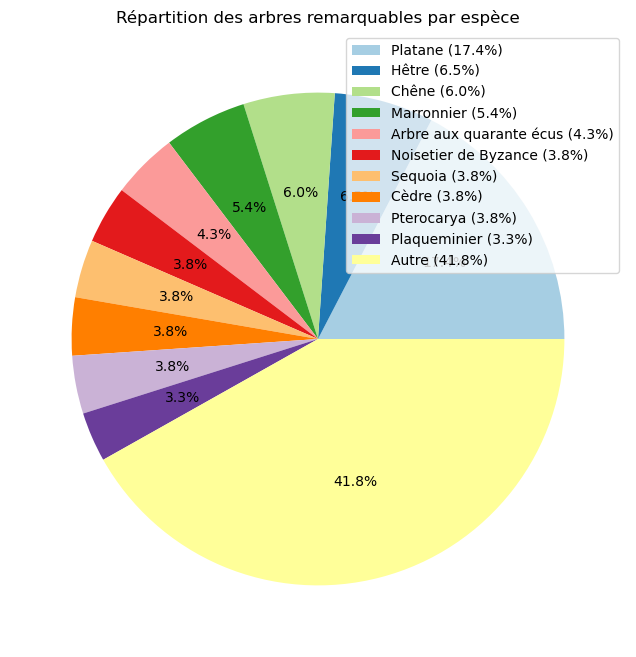

In [112]:
# Création d'un pie chart
plt.figure(figsize=(8, 8))
_, _, autopcts = plt.pie(top_10_lf_remarquables["Nombre"], autopct="%1.1f%%", colors=plt.cm.Paired.colors)

# Ajout d'une légende en haut à droite
plt.legend(top_10_lf_remarquables["libelle_francais"], loc="upper right", bbox_to_anchor=(1, 1))

# Ajout des labels dans la légende
for label, autopct in zip(plt.gca().get_legend().get_texts(), autopcts):
    label.set_text(f'{label.get_text()} ({autopct.get_text()})')

# Titre du pie chart
plt.title("Répartition des arbres remarquables par espèce")

# Affichage du pie chart
plt.show()

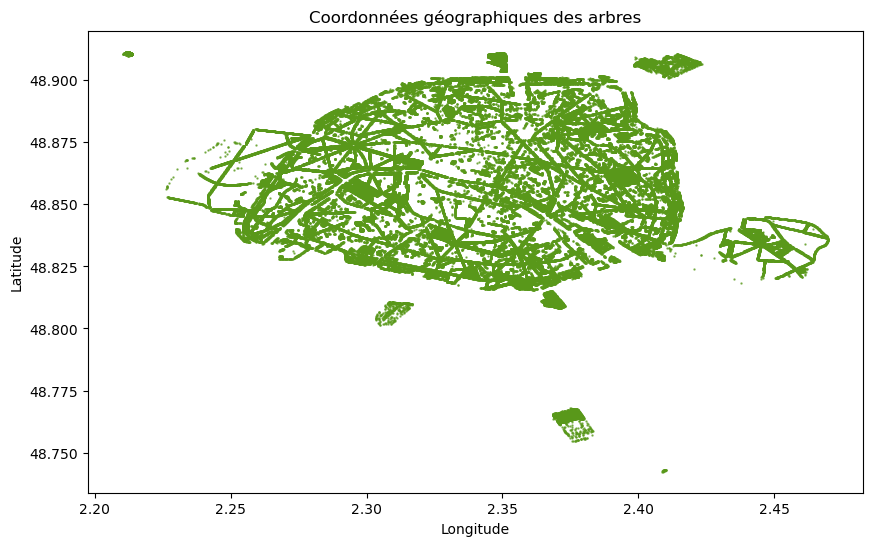

In [113]:
# Création d'un nuage de points
plt.figure(figsize=(10, 6))
plt.scatter(arbres["geo_point_2d_b"], arbres["geo_point_2d_a"], color="#59981A", alpha=0.7, s=0.5)

# Ajouter des labels et un titre
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Coordonnées géographiques des arbres")

# Afficher le nuage de points
plt.show()

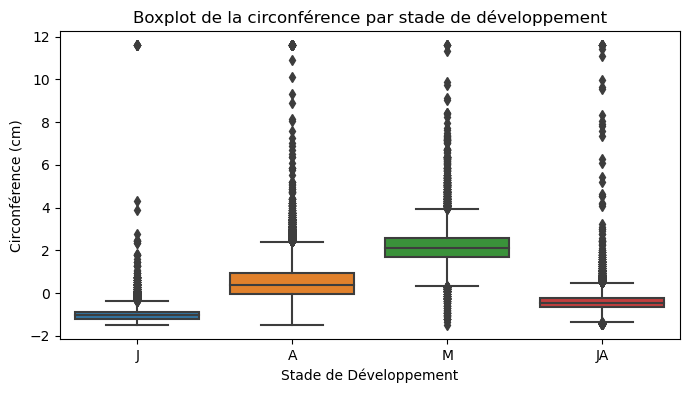

In [114]:
# Création d'un boxplot pour la colonne "circonference_cm" par "stade_developpement"
plt.figure(figsize=(8, 4))
sns.boxplot(x="stade_developpement", y="circonference_cm", data=arbres)

# Ajouter des labels et un titre
plt.xlabel("Stade de Développement")
plt.ylabel("Circonférence (cm)")
plt.title("Boxplot de la circonférence par stade de développement")

# Afficher le boxplot
plt.show()

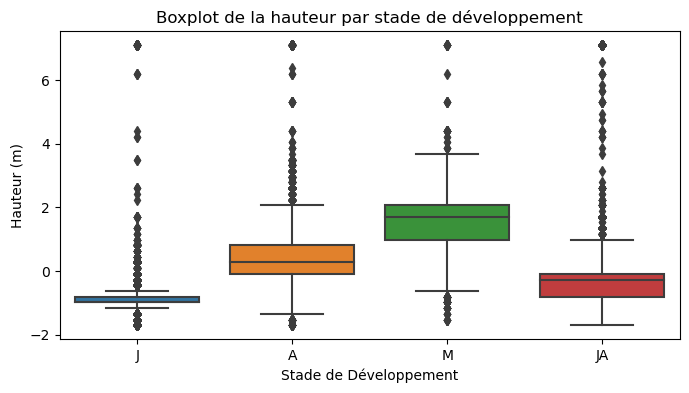

In [115]:
# Création d'un boxplot pour la colonne "hauteur_m" par "stade_developpement"
plt.figure(figsize=(8, 4))
sns.boxplot(x="stade_developpement", y="hauteur_m", data=arbres)

# Ajouter des labels et un titre
plt.xlabel("Stade de Développement")
plt.ylabel("Hauteur (m)")
plt.title("Boxplot de la hauteur par stade de développement")

# Afficher le boxplot
plt.show()